In [23]:
import pickle
import json
import numpy as np
from scipy import interpolate
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib import rc
rc('text', usetex=True)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns
from collections import OrderedDict
# sns.set_context("paper")
sns.set()
sns.set_context('talk')
import pandas as pd
%matplotlib inline

## Sum(WL, SL)

In [ ]:
# 2D grid search
lig = pickle.load(open('../Results/ressum_word2_tword015_decore0.res', 'rb'))
inria = pickle.load(open('../Results/ressum_word2_tword015_aquarius.res', 'rb'))
Res = {}
for res in lig + inria:
    gamma = res[0][0]["gamma"]
    alpha = res[0][0]["alpha_word"]
    cid = res[0][1]["CIDEr"]
    if gamma in Res:
        Res[gamma][alpha] = cid
    else:
        Res[gamma] = {alpha : cid}
G_1d = [0, .1, .2 ,.3 ,.4, .5, .6, .7, .8, .9, 1]  # np.linspace(0, 1, 11)
A_1d = [.4, .5, .6, .7, .8, .9]  # np.linspace(0.4, .9, 6)
print('alphas:', A_1d)
G, A = np.meshgrid(G_1d, A_1d)
C = np.zeros((len(A_1d), len(G_1d)))
print('C.shape', C.shape)
for i, (g, a) in enumerate(zip(G, A_1d)):
    for j, ga in enumerate(g):
        # print(i, j, ' >> g:', ga, "a:", a)
        try:
            C[i,j] = Res[ga][a]
        except:
            print('Subbing')
            C[i, j] = .86
Gsmooth, Asmooth = np.mgrid[0:1:22j, .4:.9:12j]
tck = interpolate.bisplrep(G, A, C, s=0)
Csmooth = interpolate.bisplev(Gsmooth[:,0], Asmooth[0,:], tck)
Csmooth.shape
fig = plt.figure(figsize=(13, 13))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Gsmooth, Asmooth, Csmooth, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('$\\gamma$', fontsize=20)
ax.set_ylabel('$\\alpha$', fontsize=20)
ax.set_zlabel('CIDEr', fontsize=14)
ax.text(1.5, 0.41, .6, "ML")
ax.text(1.5, 0.88, .6, "RAML")
ax.text(1., 1.05, .6, "Sentence")
ax.text(0.01, 1., .6, "Word")
# cset = ax.contour(Gsmooth, Asmooth, Csmooth, zdir='x', offset=-.5, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(20, 20)
plt.savefig('../figures/ag_grid_smooth.png',
            dpi=300, bbox_inches='tight')

## Without smoothing:
fig = plt.figure(figsize=(13, 13))
ax = fig.gca(projection='3d')
print('shapes:', G.shape, A.shape, C.shape)
surf = ax.plot_surface(G, A, C, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# cset = ax.contour(G, A, C, zdir='z', offset=.85, cmap=cm.coolwarm)
# cset = ax.contour(G, A, C, zdir='y',  offset=1.2, cmap=cm.coolwarm)

ax.set_xlabel('$\\gamma$', fontsize=20)
ax.set_ylabel('$\\alpha$', fontsize=20)
ax.set_zlabel('CIDEr', fontsize=14)
ax.text(1.5, 0.41, .86, "ML")
ax.text(1.5, 0.88, .86, "RAML")
ax.text(1., .95, .855, "Sentence")
ax.text(0.01, 1., .855, "Word")
fig.colorbar(surf, shrink=0.8)
ax.view_init(20, 20)
plt.savefig('../figures/ag_grid.png',
            dpi=300, bbox_inches='tight')

## 2D:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
cset = ax.contour(G, A, C, offset=-.5, cmap=cm.coolwarm)
ax.set_xlabel('$\\gamma$', fontsize=20)
ax.set_ylabel('$\\alpha$', fontsize=20)
ax.text(1, 0.35, "Sentence")
ax.text(0, 0.35, "Word")
ax.text(1.01, 0.41, "ML")
ax.text(1.01, 0.88, "RAML")
f.colorbar(surf, shrink=.8)
plt.savefig('../figures/ag_grid_contour.png',
            dpi=300, bbox_inches='tight')

### Matrix:
fig = plt.figure(figsize=(14, 7))
sns.heatmap(100 * C, annot=True, fmt=".2f", cmap="YlGnBu")
plt.xlabel('$\\gamma$', fontsize=20)
plt.ylabel('$\\alpha$', fontsize=20)
plt.xticks(np.arange(11)+.5, np.arange(11)/10)
plt.yticks(np.arange(6)+.5, .4+np.arange(6)/10)
plt.text(10.5, 6.5, "Sentence")
plt.text(-.2, 6.5, "Word")
plt.text(-.5, 0.2, "ML")
plt.text(-.75, 6, "RAML")
plt.savefig('../figures/ag_matrix.png',
            dpi=300, bbox_inches='tight')

In [12]:
# plot 2D matrix of metrix:
def plot_matrix_cap(Res, key1="$\\alpha_{sent}$",
                    key2='$\\alpha_{word}$',
                    scale=100, minvalue=.86,
                    output="tmp"):
    X_1d = sorted(list(Res))
    Y_1d = sorted(list(set([a for tau in Res for a in Res[tau].keys()])))
    print('Found %s:' % key1, X_1d)
    print("Found %s:" % key2, Y_1d)        
    W_1d = [.6, .7, .8, .9]  # np.linspace(0, 1, 11)
    S_1d = [.3, .4, .5, .6]  # np.linspace(0.4, .9, 6)
    X, Y = np.meshgrid(X_1d, Y_1d)
    C = np.zeros((len(Y_1d), len(X_1d)))
    subbed = 0
    for i, (s, w) in enumerate(zip(X, Y_1d)):
        for j, sw in enumerate(s):
            try:
                C[i,j] = Res[sw][w]
            except:
                subbed += 1
                C[i, j] = minvalue
    print('Filled %d values with default' % subbed)
    sns.set()
    fig = plt.figure(figsize=(14, 7))
    sns.heatmap(scale * C, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.xlabel(key1, fontsize=20)
    plt.ylabel(key2, fontsize=20)
    plt.xticks(np.arange(len(X_1d))+.5, np.array(X_1d))
    plt.yticks(np.arange(len(Y_1d))+.5, np.array(Y_1d))
    #plt.text(10.5, 6.5, "Sentence")
    #plt.text(-.2, 6.5, "Word")
    #plt.text(-.5, 0.2, "ML")
    #plt.text(-.75, 6, "RAML")
    plt.savefig('../figures/%s.png' % output,
                dpi=300, bbox_inches='tight')

## Combine(WL, SL)

Found $\alpha_{sent}$: [0.2, 0.3, 0.4, 0.5, 0.6]
Found $\alpha_{word}$: [0.6, 0.7, 0.8, 0.9]
Filled 3 values with default


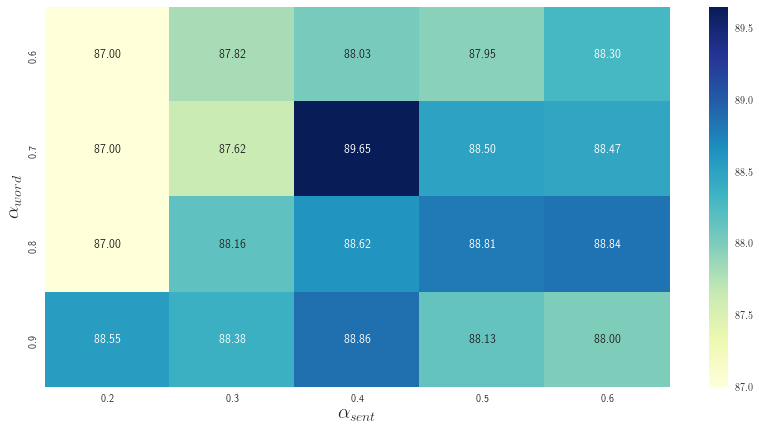

In [27]:
# 2D grid search
# lig = pickle.load(open('../Results/rescomplete_hyperion.res', 'rb'))
inria = pickle.load(open('../Results/rescomplete_clear.inrialpes.fr.res', 'rb'))
Res = OrderedDict()
for res in inria:
    params = res[0][0]
    if params['caption_model'] == "show_tell" and params['finetune_cnn_after'] == -1:
        aword = params["alpha_word"]
        asent = params["alpha_sent"]
        cid = res[0][1]["CIDEr"]
        if asent in Res:
            Res[asent][aword] = cid
        else:
            Res[asent] = OrderedDict({aword : cid})
plot_matrix_cap(Res, minvalue=.87)

## WL, SL Top-Down/ Adaptive / Show&Tell

Found $\tau_{word}$: [0.06, 0.09, 0.12, 0.13, 0.15, 0.17]
Found $\alpha_{word}$: [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Filled 25 values with default


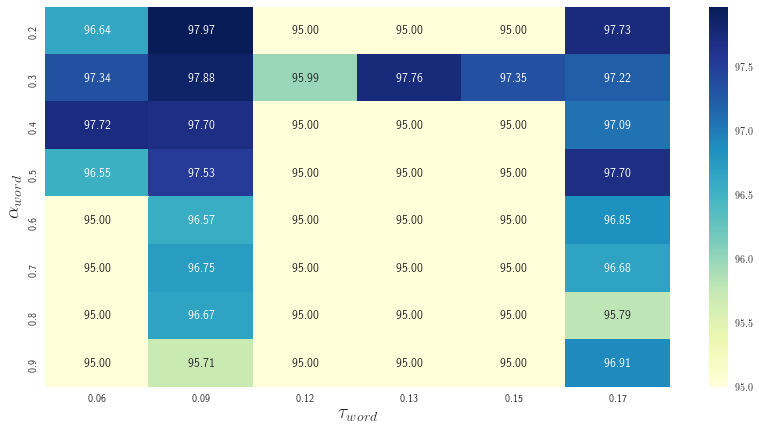

In [35]:
inria = pickle.load(open('../Results/resword2*topdown_clear.inrialpes.fr.res', 'rb'))
Res = OrderedDict()
for res in inria:
    alpha = res[0][0]["alpha_word"]
    tau = res[0][0]["tau_word"]
    cid = res[0][1]["CIDEr"]
    if tau in Res:
        Res[tau][alpha] = cid
    else:
        Res[tau] = OrderedDict({alpha : cid})
plot_matrix_cap(Res, key1='$\\tau_{word}$',
               key2='$\\alpha_{word}$',
               output='word_topdown_matrix',
               minvalue=.95)
word_topdown = Res

Found $\tau_{sent}$: [0.13, 0.17]
Found $\alpha_{sent}$: [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
Filled 1 values with default


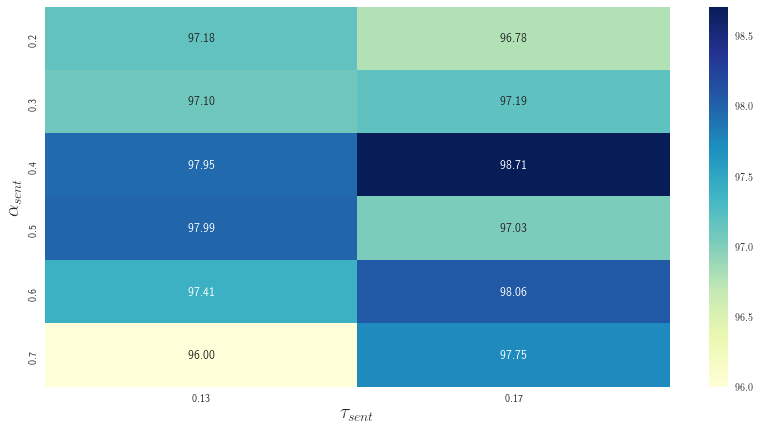

In [34]:
inria = pickle.load(open('../Results/ressample2*topdown_clear.inrialpes.fr.res', 'rb'))
Res = OrderedDict()
for res in inria:
    alpha = res[0][0]["alpha_sent"]
    tau = res[0][0]["tau_sent"]
    cid = res[0][1]["CIDEr"]
    if tau in Res:
        Res[tau][alpha] = cid
    else:
        Res[tau] = OrderedDict({alpha : cid})
plot_matrix_cap(Res, key1='$\\tau_{sent}$',
               key2='$\\alpha_{sent}$',
               output='sent_topdown_matrix',
               minvalue=.96)      
sent_topdown = Res

Found $\tau_{word}$: [0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.2]
Found $\alpha_{word}$: [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Filled 36 values with default


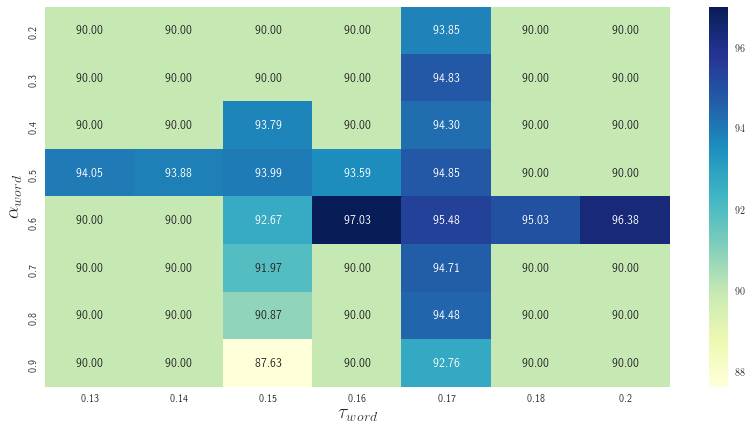

In [123]:
inria = pickle.load(open('../Results/resword2*adaatt_clear.inrialpes.fr.res', 'rb'))
Res = OrderedDict()
for res in inria:
    alpha = res[0][0]["alpha_word"]
    tau = res[0][0]["tau_word"]
    cid = res[0][1]["CIDEr"]
    if tau in Res:
        Res[tau][alpha] = cid
    else:
        Res[tau] = OrderedDict({alpha : cid})
plot_matrix_cap(Res, key1='$\\tau_{word}$',
               key2='$\\alpha_{word}$',
               output='word_adaatt_matrix',
               minvalue=.9)  
word_adaatt = Res

Found $\tau_{sent}$: [0.17]
Found $\alpha_{sent}$: [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
Filled 0 values with default


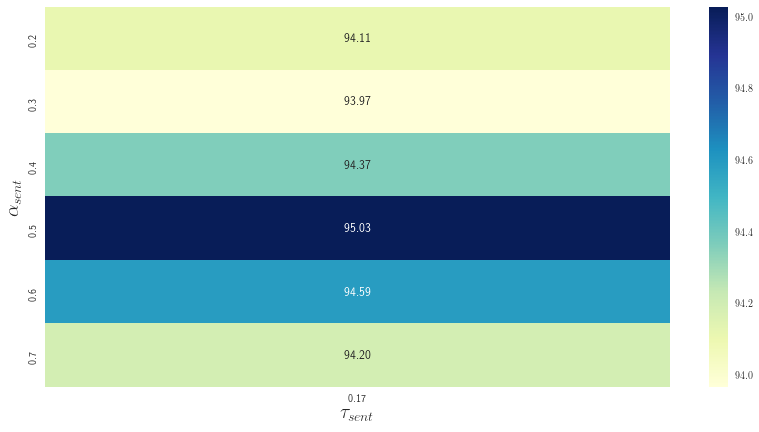

In [37]:
inria = pickle.load(open('../Results/ressample2*adaatt_clear.inrialpes.fr.res', 'rb'))
Res = OrderedDict()
for res in inria:
    alpha = res[0][0]["alpha_sent"]
    tau = res[0][0]["tau_sent"]
    cid = res[0][1]["CIDEr"]
    if tau in Res:
        Res[tau][alpha] = cid
    else:
        Res[tau] = OrderedDict({alpha : cid})
plot_matrix_cap(Res, key1='$\\tau_{sent}$',
               key2='$\\alpha_{sent}$',
               output='sent_adaatt_matrix',
               minvalue=.93)      
sent_adaatt = Res

Found $\tau_{word}$: [0.1, 0.13, 0.15, 0.17, 0.2, 0.3]
Found $\alpha_{word}$: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
Filled 39 values with default


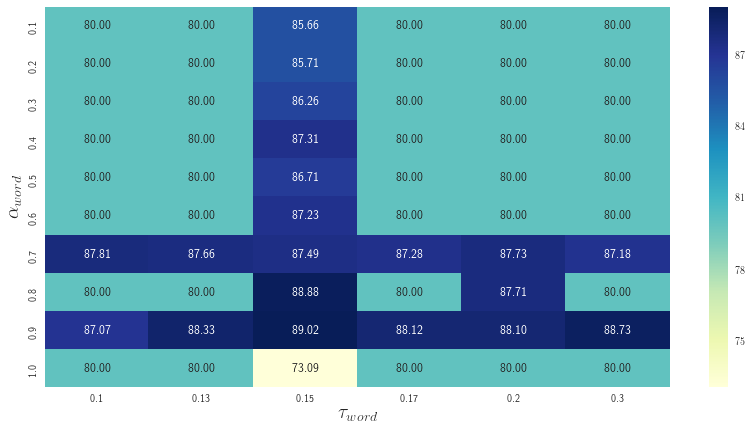

In [89]:
inria = pickle.load(open('../Results/resword2_clear.inrialpes.fr.res', 'rb'))
lig = pickle.load(open('../Results/resword2_decore1.res', 'rb'))

Res = OrderedDict()
for res in inria + lig:
    simi = res[0][0]['similarity_matrix']
    idf = res[0][0].get('rare_tfidf', 0)
    if 'train_coco' in simi and not idf:
        try:
            alpha = res[0][0]["alpha_word"]
        except:
            alpha = res[0][0]["alpha"]
        try:
            tau = res[0][0]["tau_word"]
        except:
            tau = res[0][0]["tau"]
        cid = res[0][1]["CIDEr"]
        if tau in Res:
            Res[tau][alpha] = cid
        else:
            Res[tau] = OrderedDict({alpha : cid})

plot_matrix_cap(Res, key1='$\\tau_{word}$',
               key2='$\\alpha_{word}$',
               output='word_coco_showtell',
               minvalue=.8)
word_showtell = Res

Found $\tau_{sent}$: [0.09, 0.095, 0.1, 0.13, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2]
Found $\alpha_{sent}$: [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Filled 56 values with default


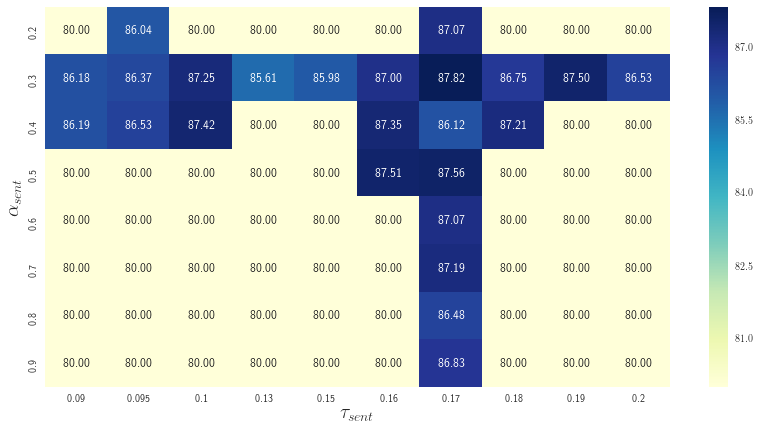

In [82]:
inria = pickle.load(open('../Results/ressample2_clear.inrialpes.fr.res', 'rb'))
lig = pickle.load(open('../Results/ressample2_decore1.res', 'rb'))

Res = OrderedDict()
for res in inria + lig:
    try:
        alpha = res[0][0]["alpha_sent"]
    except:
        alpha = res[0][0]["alpha"]
    try:
        tau = res[0][0]["tau_sent"]
    except:
        tau = res[0][0]["tau"]
    cid = res[0][1]["CIDEr"]
    if tau in Res:
        Res[tau][alpha] = cid
    else:
        Res[tau] = OrderedDict({alpha : cid})
plot_matrix_cap(Res, key1='$\\tau_{sent}$',
               key2='$\\alpha_{sent}$',
               output='sent_showtell',
               minvalue=.8)
sent_showtell = Res

In [118]:
## Combining different models:
### cst tau
w_topdown_t009 = [sorted(list(word_topdown[0.09]))]
w_topdown_t009.append([96.34] + [100 * word_topdown[0.09][k] for k in w_topdown_t009[0]])
w_topdown_t009[0].insert(0, 0)
print(w_topdown_t009)

w_topdown_t017 = [sorted(list(word_topdown[0.17]))]
w_topdown_t017.append([96.34] + [100 * word_topdown[0.17][k] for k in w_topdown_t017[0]])
w_topdown_t017[0].insert(0, 0)
print(w_topdown_t017)

### cst alpha
w_topdown_a03 = [sorted([tau for tau in word_topdown if 0.3 in word_topdown[tau]])]
w_topdown_a03.append([100 * word_topdown[k][0.3] for k in w_topdown_a03[0]])
print(w_topdown_a03)

s_topdown_t017 = [sorted(list(sent_topdown[0.17]))]
s_topdown_t017.append([96.34] + [100 * sent_topdown[0.17][k] for k in s_topdown_t017[0]])
s_topdown_t017[0].insert(0, 0)
print(s_topdown_t017)

w_adaatt_t017 = [sorted(list(word_adaatt[0.17]))]
w_adaatt_t017.append([93.72] + [100 * word_adaatt[0.17][k] for k in w_adaatt_t017[0]])
w_adaatt_t017[0].insert(0, 0)
print(w_adaatt_t017)

s_adaatt_t017 = [sorted(list(sent_adaatt[0.17]))]
s_adaatt_t017.append([93.72] + [100 * sent_adaatt[0.17][k] for k in s_adaatt_t017[0]])
s_adaatt_t017[0].insert(0, 0)
print(s_adaatt_t017)

w_show_t015 = [sorted(list(word_showtell[0.15]))]
w_show_t015.append([84.66] + [100 * word_showtell[0.15][k] for k in w_show_t015[0]])
w_show_t015[0].insert(0, 0)
print(w_show_t015)

w_show_a07 = [sorted([tau for tau in word_showtell if 0.7 in word_showtell[tau]])]
w_show_a07.append([100 * word_showtell[k][0.7] for k in w_show_a07[0]])
print(w_show_a07)

w_show_a09 = [sorted([tau for tau in word_showtell if 0.9 in word_showtell[tau]])]
w_show_a09.append([100 * word_showtell[k][0.9] for k in w_show_a09[0]])
print(w_show_a09)

s_show_t017 = [sorted(list(sent_showtell[0.17]))]
s_show_t017.append([84.66] + [100 * sent_showtell[0.17][k] for k in s_show_t017[0]])
s_show_t017[0].insert(0, 0)
print(s_show_t017)

s_show_a03 = [sorted([tau for tau in sent_showtell if 0.3 in sent_showtell[tau]])]
s_show_a03.append([100 * sent_showtell[k][0.3] for k in s_show_a03[0]])
print(s_show_a03)

[[0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], [96.34, 97.971912453573637, 97.875504031359597, 97.70435100792929, 97.53156216493025, 96.574842138658028, 96.752771145487316, 96.665951752031233, 95.711227944395986]]
[[0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], [96.34, 97.73187230902542, 97.22023448086469, 97.089352578012623, 97.701420605697933, 96.852265594721004, 96.675411216783786, 95.794059571573172, 96.91031903645316]]
[[0.06, 0.09, 0.12, 0.13, 0.15, 0.17], [97.341727446393804, 97.875504031359597, 95.986340512926446, 97.755864431593736, 97.346327146311978, 97.22023448086469]]
[[0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [96.34, 96.777008859785099, 97.188569446228044, 98.710335161550134, 97.028019085583651, 98.064818758784739, 97.746865396096837]]
[[0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], [93.72, 93.854975731623455, 94.828444142652472, 94.298486458381731, 94.846677526267314, 95.48487994979503, 94.7078597252533, 94.481331890484029, 92.762546375829515]]
[[0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [9

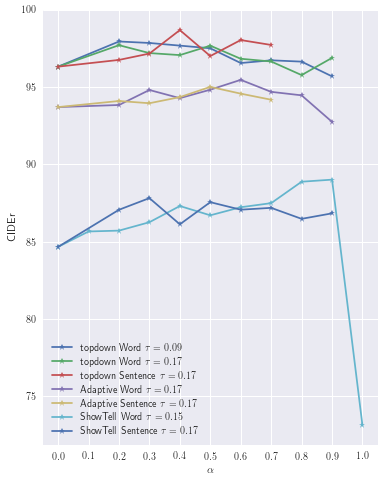

In [129]:
sns.set()
plt.figure(figsize=(6,8))
plt.plot(w_topdown_t009[0], w_topdown_t009[1], marker="*", label='topdown Word $\\tau=0.09$')
plt.plot(w_topdown_t017[0], w_topdown_t017[1], marker="*", label='topdown Word $\\tau=0.17$')
plt.plot(s_topdown_t017[0], s_topdown_t017[1], marker="*", label='topdown Sentence $\\tau=0.17$')


plt.plot(w_adaatt_t017[0], w_adaatt_t017[1], marker="*", label='Adaptive Word $\\tau=0.17$')
plt.plot(s_adaatt_t017[0], s_adaatt_t017[1], marker="*", label='Adaptive Sentence $\\tau=0.17$')

plt.plot(w_show_t015[0], w_show_t015[1], marker="*", label='ShowTell Word $\\tau=0.15$')
plt.plot(s_show_t017[0], s_show_t017[1], marker="*", label='ShowTell Sentence $\\tau=0.17$')
plt.xticks(np.arange(11)/10)
plt.xlabel('$\\alpha$')
plt.ylabel('CIDEr')
plt.legend()
plt.savefig('../figures/grid_alpha.png', dpi=300, bbox_inches='tight')

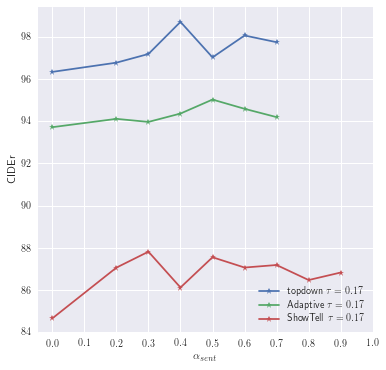

In [125]:
sns.set()
plt.figure(figsize=(6,6))
plt.plot(s_topdown_t017[0], s_topdown_t017[1], marker="*", label='topdown $\\tau=0.17$')
plt.plot(s_adaatt_t017[0], s_adaatt_t017[1], marker="*", label='Adaptive $\\tau=0.17$')
plt.plot(s_show_t017[0], s_show_t017[1], marker="*", label='ShowTell $\\tau=0.17$')
plt.xticks(np.arange(11)/10)
plt.xlabel('$\\alpha_{sent}$')
plt.ylabel('CIDEr')
plt.legend()
plt.savefig('../figures/sent_grid_alpha.png', dpi=300, bbox_inches='tight')

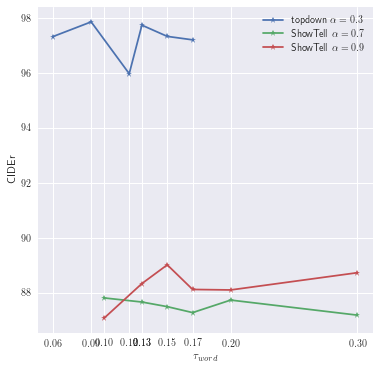

In [126]:
sns.set()
plt.figure(figsize=(6,6))
plt.plot(w_topdown_a03[0], w_topdown_a03[1], marker="*", label='topdown $\\alpha=0.3$')
plt.plot(w_show_a07[0], w_show_a07[1], marker="*", label='ShowTell $\\alpha=0.7$')
plt.plot(w_show_a09[0], w_show_a09[1], marker="*", label='ShowTell $\\alpha=0.9$')
plt.xticks([.06, 0.09, 0.1,.12, .13, .13, .15, .17, .2, .3])
plt.xlabel('$\\tau_{word}$')
plt.ylabel('CIDEr')
plt.legend()
plt.savefig('../figures/word_grid_tau.png', dpi=300, bbox_inches='tight')

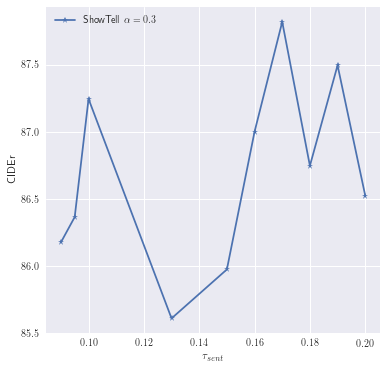

In [127]:
sns.set()
plt.figure(figsize=(6,6))
plt.plot(s_show_a03[0], s_show_a03[1], marker="*", label='ShowTell $\\alpha=0.3$')
# plt.xticks([.06, 0.09, 0.1,.12, .13, .13, .15, .17, .2, .3])
plt.xlabel('$\\tau_{sent}$')
plt.ylabel('CIDEr')
plt.legend()
plt.savefig('../figures/sent_grid_tau.png', dpi=300, bbox_inches='tight')

### Word Show&Tell witg IDF scaling & Glove Gigaword

sim: data/Glove/train_coco_similarities.pkl xIDF: 1
sim: data/Glove/train_coco_similarities.pkl xIDF: 1
sim: data/Glove/train_coco_similarities.pkl xIDF: 1
sim: data/Glove/train_coco_similarities.pkl xIDF: 1
Found $\tau_{word}$: [0.15, 0.2]
Found $\alpha_{word}$: [0.9]
Filled 0 values with default


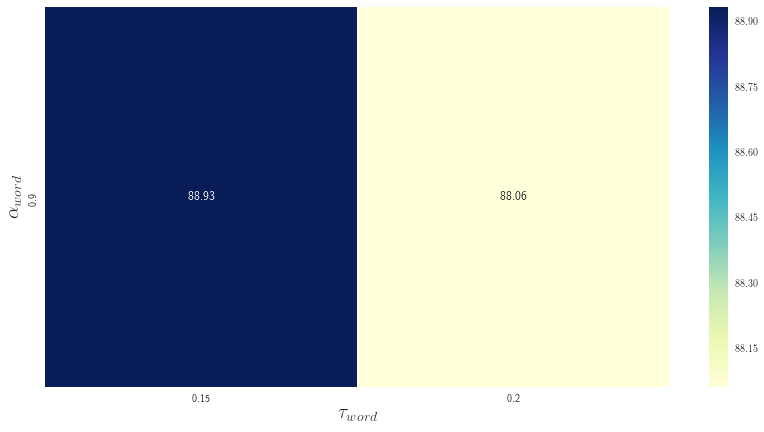

In [26]:
inria = pickle.load(open('../Results/resword2_clear.inrialpes.fr.res', 'rb'))
Res = OrderedDict()
for res in inria:
    simi = res[0][0]['similarity_matrix']
    idf = res[0][0].get('rare_tfidf', 0)
    if 'train_coco' in simi and idf:
        print('sim:', simi, 'xIDF:', idf)
        try:
            alpha = res[0][0]["alpha_word"]
        except:
            alpha = res[0][0]["alpha"]
        try:
            tau = res[0][0]["tau_word"]
        except:
            tau = res[0][0]["tau"]
        cid = res[0][1]["CIDEr"]
        if tau in Res:
            Res[tau][alpha] = cid
        else:
            Res[tau] = {alpha : cid}
plot_matrix_cap(Res, key1='$\\tau_{word}$',
               key2='$\\alpha_{word}$',
               output='word_coco_idf_showtell',
               minvalue=.8)

In [ ]:
inria = pickle.load(open('../Results/resword2_clear.inrialpes.fr.res', 'rb'))
Res = {}
for res in inria:
    simi = res[0][0]['similarity_matrix']
    idf = res[0][0].get('rare_tfidf', 0)
    if ('cocotalk' in simi or 'glove' in simi) and not idf:
        # print('sim:', simi, 'xIDF:', idf)
        try:
            alpha = res[0][0]["alpha_word"]
        except:
            alpha = res[0][0]["alpha"]
        try:
            tau = res[0][0]["tau_word"]
        except:
            tau = res[0][0]["tau"]
        cid = res[0][1]["CIDEr"]
        if tau in Res:
            Res[tau][alpha] = cid
        else:
            Res[tau] = {alpha : cid}
plot_matrix_cap(Res, key1='$\\tau_{word}$',
               key2='$\\alpha_{word}$',
               output='word_glove_showtell',
               minvalue=.8)

## CNN Finetuning:

In [ ]:
inria = pickle.load(open('../Results/resfncnn6_word2*topdown_clear.inrialpes.fr.res', 'rb'))
Res = {}
for res in inria:
    alpha = res[0][0]["alpha_word"]
    tau = res[0][0]["tau_word"]
    cid = res[0][1]["CIDEr"]
    if tau in Res:
        Res[tau][alpha] = cid
    else:
        Res[tau] = {alpha : cid}
plot_matrix_cap(Res, key1='$\\tau_{word}$',
               key2='$\\alpha_{word}$',
               output='word_cnn_topdown_matrix',
               minvalue=.98)    

In [ ]:
inria = pickle.load(open('../Results/resfncnn6_sample2*topdown_clear.inrialpes.fr.res', 'rb'))
Res = {}
for res in inria:
    alpha = res[0][0]["alpha_sent"]
    tau = res[0][0]["tau_sent"]
    cid = res[0][1]["CIDEr"]
    if tau in Res:
        Res[tau][alpha] = cid
    else:
        Res[tau] = {alpha : cid}
plot_matrix_cap(Res, key1='$\\tau_{sent}$',
               key2='$\\alpha_{sent}$',
               output='sent_cnn_topdown_matrix',
               minvalue=.99)     

In [ ]:
inria = pickle.load(open('../Results/resfncnn6_word2*adaatt_clear.inrialpes.fr.res', 'rb'))
Res = {}
for res in inria:
    alpha = res[0][0]["alpha_word"]
    tau = res[0][0]["tau_word"]
    cid = res[0][1]["CIDEr"]
    if tau in Res:
        Res[tau][alpha] = cid
    else:
        Res[tau] = {alpha : cid}

plot_matrix_cap(Res, key1='$\\tau_{word}$',
               key2='$\\alpha_{word}$',
               output='word_cnn_adaatt_matrix',
               minvalue=.9)       

In [ ]:
inria = pickle.load(open('../Results/resfncnn6_sample2*adaatt_clear.inrialpes.fr.res', 'rb'))
Res = {}
for res in inria:
    alpha = res[0][0]["alpha_sent"]
    tau = res[0][0]["tau_sent"]
    cid = res[0][1]["CIDEr"]
    if tau in Res:
        Res[tau][alpha] = cid
    else:
        Res[tau] = {alpha : cid}
plot_matrix_cap(Res, key1='$\\tau_{sent}$',
               key2='$\\alpha_{sent}$',
               output='sent_cnn_adaatt_matrix',
               minvalue=.98)   

# NMT

sim: data/WMT14/fr_similarities.pkl xIDF: 0
sim: data/WMT14/fr_similarities.pkl xIDF: 0
sim: data/WMT14/fr_similarities.pkl xIDF: 0
sim: data/WMT14/fr_similarities.pkl xIDF: 0
sim: data/WMT14/fr_similarities.pkl xIDF: 0
sim: data/WMT14/fr_similarities.pkl xIDF: 0
sim: data/WMT14/fr_similarities.pkl xIDF: 0
sim: data/WMT14/fr_similarities.pkl xIDF: 0
sim: data/WMT14/fr_similarities.pkl xIDF: 0
sim: data/WMT14/fr_similarities.pkl xIDF: 0
sim: data/WMT14/fr_similarities.pkl xIDF: 0
sim: data/WMT14/fr_similarities.pkl xIDF: 0
sim: data/WMT14/fr_similarities.pkl xIDF: 0
sim: data/WMT14/fr_similarities.pkl xIDF: 0
sim: data/WMT14/fr_similarities.pkl xIDF: 0
sim: data/WMT14/fr_similarities.pkl xIDF: 0
sim: data/WMT14/fr_similarities.pkl xIDF: 0
sim: data/WMT14/fr_similarities.pkl xIDF: 0
Found $\tau_{word}$: [0.07, 0.1, 0.2, 0.25, 0.3, 0.35]
Found $\alpha_{word}$: [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Filled 31 values with default


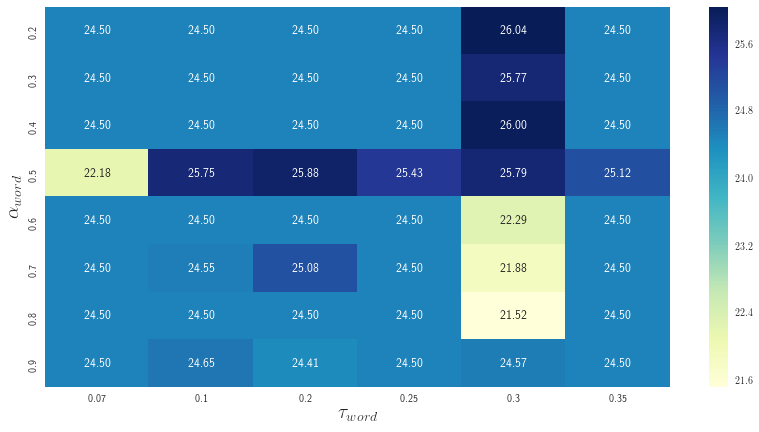

In [130]:
inria = pickle.load(open('../../seq2seq/Results/resword2_clear.inrialpes.fr.res', 'rb'))
lig = pickle.load(open('../../seq2seq/Results/resword2_decore1.res', 'rb'))

Res = {}
for res in inria + lig:
    simi = res[0][0]['similarity_matrix']
    idf = res[0][0].get('rare_tfidf', 0)
    print('sim:', simi, 'xIDF:', idf)
    try:
        alpha = res[0][0]["alpha_word"]
    except:
        alpha = res[0][0]["alpha"]
    try:
        tau = res[0][0]["tau_word"]
    except:
        tau = res[0][0]["tau"]
    cid = res[0][1]
    if tau in Res:
        Res[tau][alpha] = cid
    else:
        Res[tau] = {alpha : cid}
        
plot_matrix_cap(Res, key1='$\\tau_{word}$',
               key2='$\\alpha_{word}$',
               output='nmt_word2',
               minvalue=24.5, scale=1)

Found $\tau_{sent}$: [0.09, 0.12, 0.13, 0.15, 0.17, 0.2, 0.23, 0.27]
Found $\alpha_{sent}$: [0.2, 0.3, 0.4, 0.5, 0.6]
Filled 24 values with default


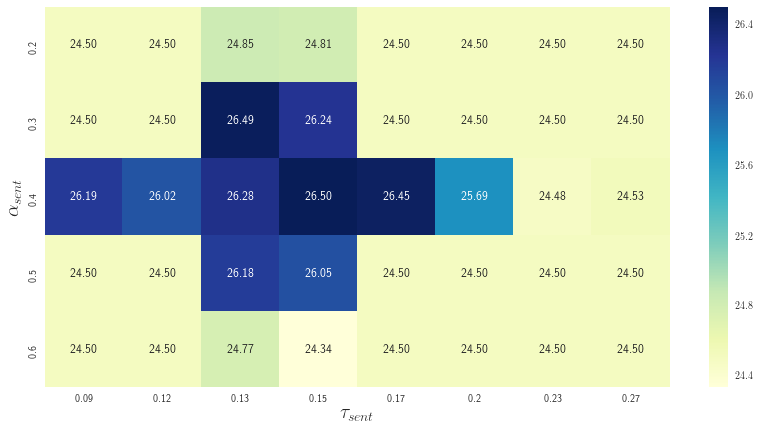

In [131]:
inria = pickle.load(open('../../seq2seq/Results/ressample2_clear.inrialpes.fr.res', 'rb'))
lig = pickle.load(open('../../seq2seq/Results/ressample2_decore1.res', 'rb'))

Res = {}
for res in inria + lig:
    try:
        alpha = res[0][0]["alpha_sent"]
    except:
        alpha = res[0][0]["alpha"]
    try:
        tau = res[0][0]["tau_sent"]
    except:
        tau = res[0][0]["tau"]
    cid = res[0][1]
    if tau in Res:
        Res[tau][alpha] = cid
    else:
        Res[tau] = {alpha : cid}

plot_matrix_cap(Res, key1='$\\tau_{sent}$',
               key2='$\\alpha_{sent}$',
               output='nmt_sent',
               minvalue=24.5, scale=1)